**Uploading the Dataset**


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Suicide_bombing_attacks (1).csv to Suicide_bombing_attacks (1).csv


**Installing Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the Dataset**

In [ ]:
# Load the uploaded dataset
df = pd.read_csv('Suicide_bombing_attacks (1).csv')

# Check the first few rows
df.head()


,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


**Information about the Dataset**

In [ ]:
# Check the rows and columns
print(df.shape)

# Check information of the dataset
df.info()

# description
df.describe()


(988, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type     

,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,983.000000,696.00000,988.000000,726.000000,824.000000,978.000000,974.000000
mean,32.618279,14.79023,15.253138,31.498623,1.116505,21.093650,69.939612
std,2.475619,17.61733,19.957268,38.656426,0.395625,8.375656,15.081500
min,24.879503,0.00000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,31.823800,3.00000,3.000000,7.000000,1.000000,14.650000,58.282250
50%,33.583300,8.00000,8.000000,20.000000,1.000000,21.295000,70.331000
75%,34.004300,20.25000,18.000000,40.000000,1.000000,28.145000,82.499000
max,35.383300,125.00000,148.000000,320.000000,4.000000,44.000000,111.000000


**Handle Missing Values**

In [ ]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values
df.fillna(0, inplace=True) # Fill missing values with 0


**Attack Frequency by Year and Month**

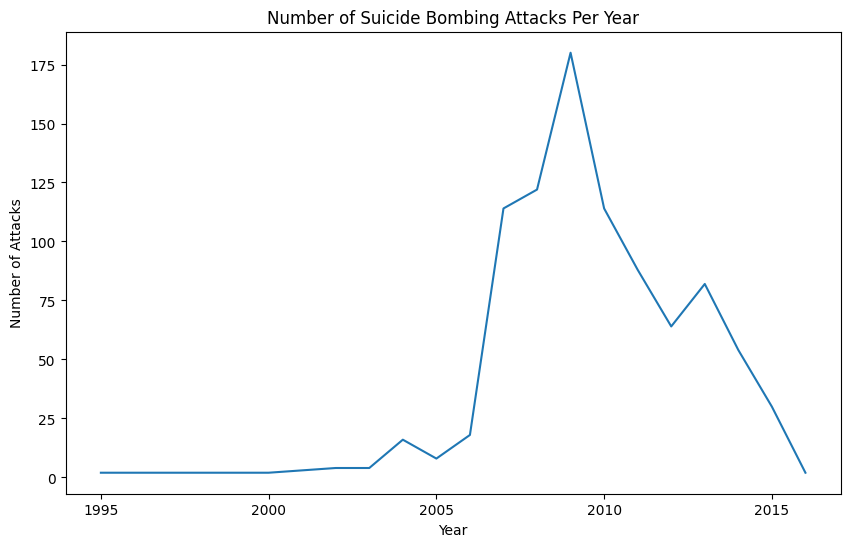

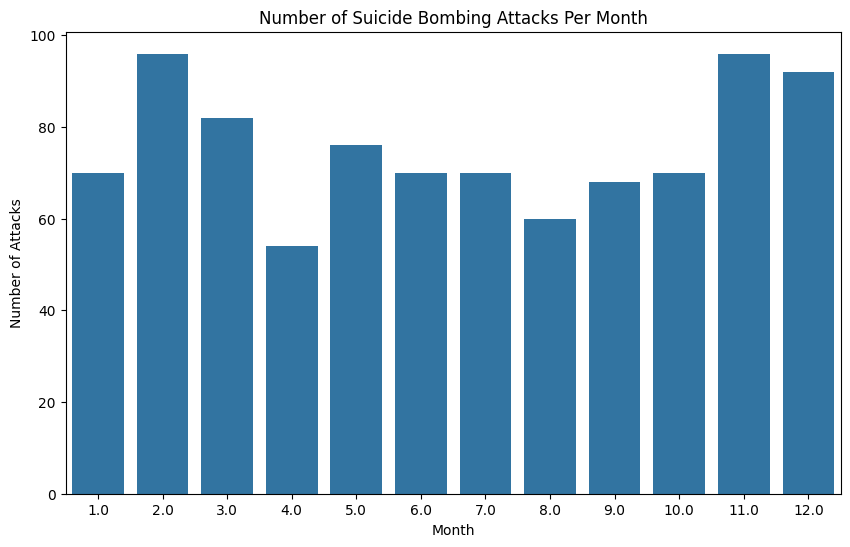

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year, month, and day of the week from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()

# Step 1: Attack frequency by year
attacks_per_year = df['Year'].value_counts().sort_index()

# Plot attacks per year
plt.figure(figsize=(10,6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Number of Suicide Bombing Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# Step 2: Attack frequency by month
attacks_per_month = df['Month'].value_counts().sort_index()

# Plot attacks per month
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_per_month.index, y=attacks_per_month.values)
plt.title('Number of Suicide Bombing Attacks Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()


**Attack Frequency by Days of the Week**

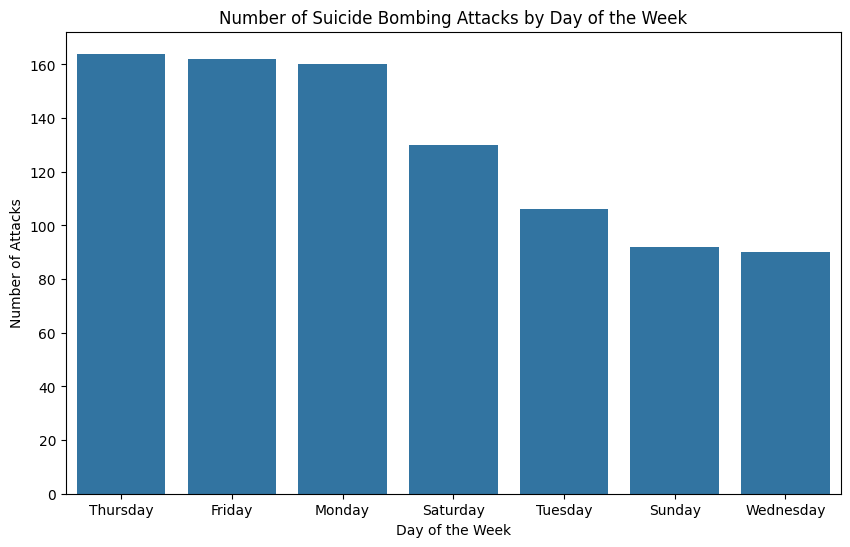

In [ ]:
# Step 3: Attack frequency by day of the week
attacks_by_day_of_week = df['Day_of_Week'].value_counts()

# Plot attacks by day of the week
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_day_of_week.index, y=attacks_by_day_of_week.values)
plt.title('Number of Suicide Bombing Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.show()


**Attack By Cities**

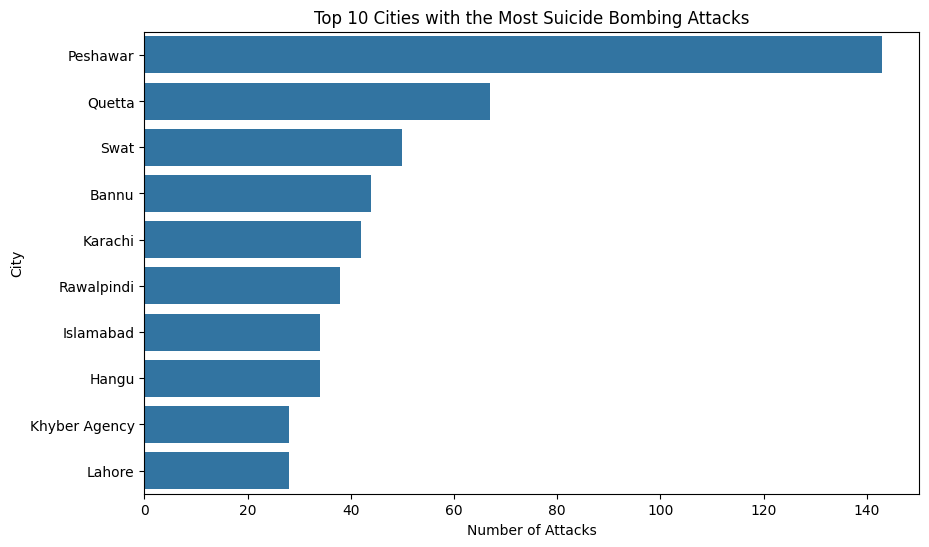

In [ ]:
# Step 1: Count the number of attacks by city
attacks_by_city = df['City'].value_counts().head(10)  # Cities with most attack

# Plot the number of attacks by city
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_city.values, y=attacks_by_city.index)
plt.title('Top 10 Cities with the Most Suicide Bombing Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City')
plt.show()



**Attack by Province**

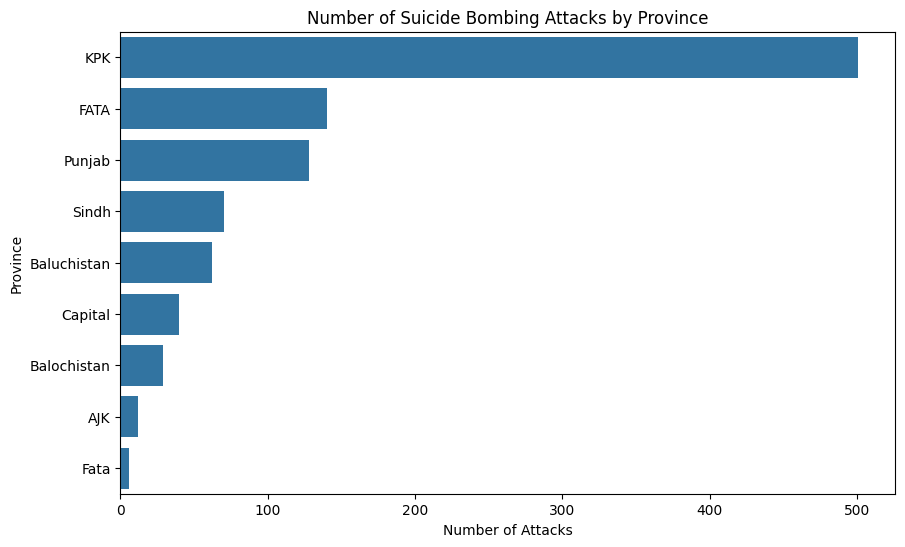

In [ ]:
# Step 2: Count the number of attacks by province
attacks_by_province = df['Province'].value_counts()

# Plot the number of attacks by province
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_province.values, y=attacks_by_province.index)
plt.title('Number of Suicide Bombing Attacks by Province')
plt.xlabel('Number of Attacks')
plt.ylabel('Province')
plt.show()


**Region with Most Attacks**

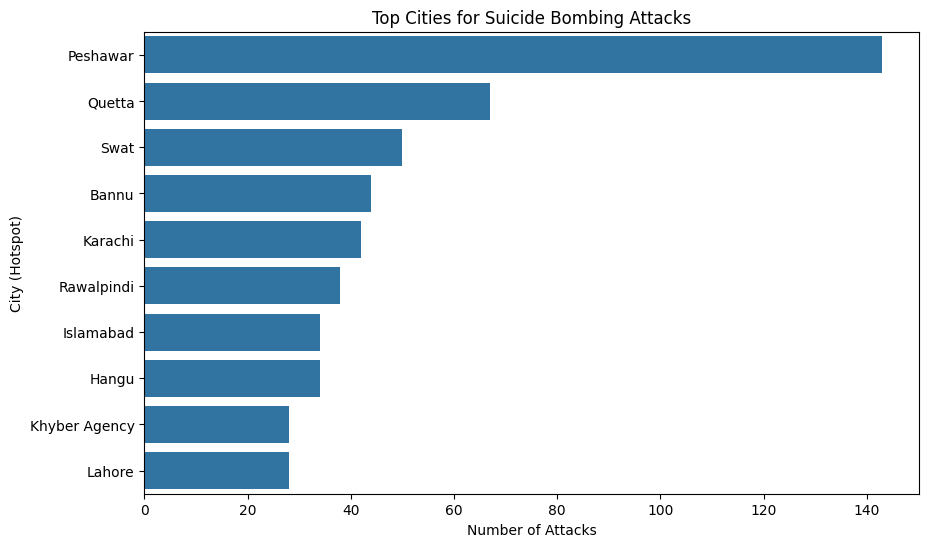

In [ ]:
# Step 3: Identify (top cities with the most attacks)
hotspot_cities = df['City'].value_counts().head(10)

# Plot the number of attacks in hotspot cities
plt.figure(figsize=(10,6))
sns.barplot(x=hotspot_cities.values, y=hotspot_cities.index)
plt.title('Top Cities for Suicide Bombing Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City (Hotspot)')
plt.show()


**Number of Deaths**

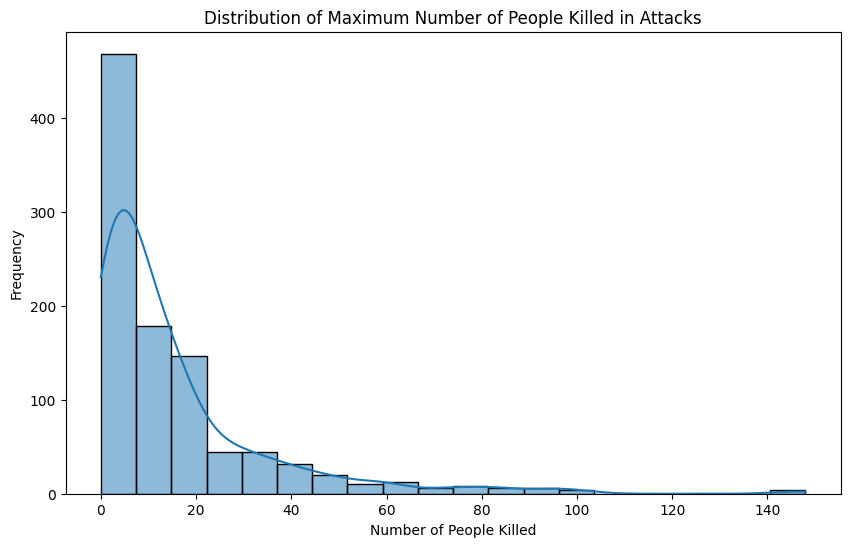

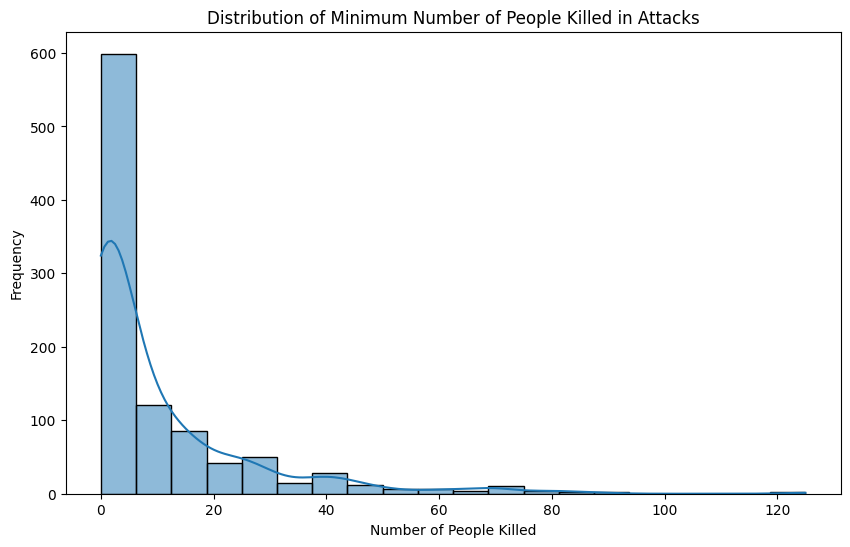

In [ ]:
# Convert values to numeric
df['Killed Min'] = pd.to_numeric(df['Killed Min'], errors='coerce')
df['Killed Max'] = pd.to_numeric(df['Killed Max'], errors='coerce')

# Plot the distribution of the maximum number of people killed
plt.figure(figsize=(10,6))
sns.histplot(df['Killed Max'].dropna(), bins=20, kde=True)
plt.title('Distribution of Maximum Number of People Killed in Attacks')
plt.xlabel('Number of People Killed')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the minimum number of people killed
plt.figure(figsize=(10,6))
sns.histplot(df['Killed Min'].dropna(), bins=20, kde=True)
plt.title('Distribution of Minimum Number of People Killed in Attacks')
plt.xlabel('Number of People Killed')
plt.ylabel('Frequency')
plt.show()



**People Injured**

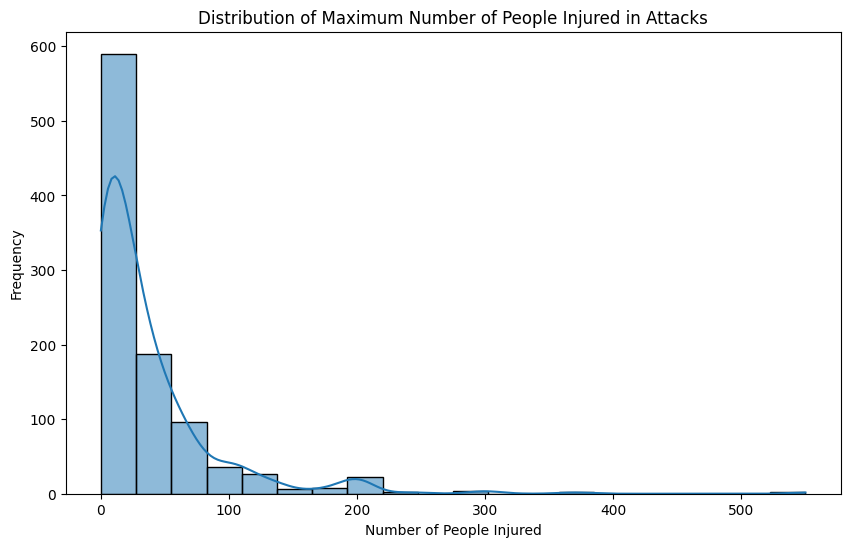

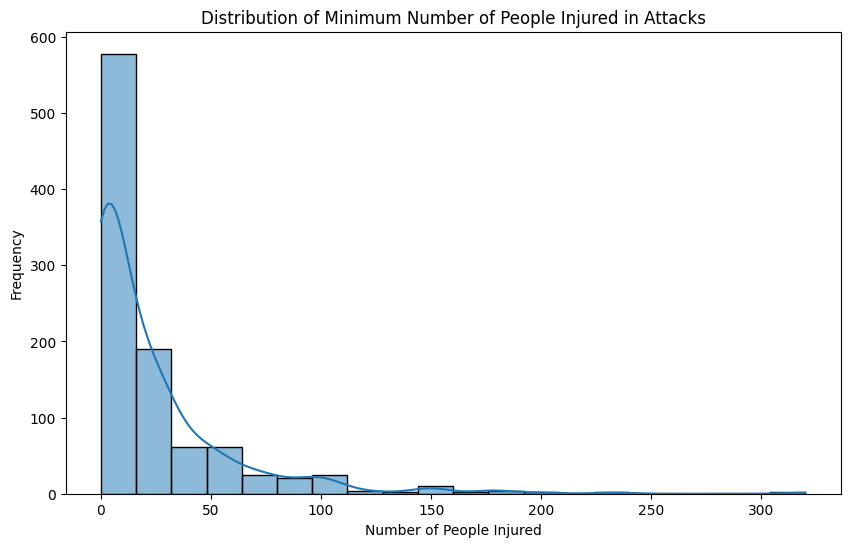

In [ ]:
# Convert values to numeric (if needed)
df['Injured Min'] = pd.to_numeric(df['Injured Min'], errors='coerce')
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

# Plot the distribution of the maximum number of people injured
plt.figure(figsize=(10,6))
sns.histplot(df['Injured Max'].dropna(), bins=20, kde=True)
plt.title('Distribution of Maximum Number of People Injured in Attacks')
plt.xlabel('Number of People Injured')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the minimum number of people injured
plt.figure(figsize=(10,6))
sns.histplot(df['Injured Min'].dropna(), bins=20, kde=True)
plt.title('Distribution of Minimum Number of People Injured in Attacks')
plt.xlabel('Number of People Injured')
plt.ylabel('Frequency')
plt.show()


**Casuality across Region**

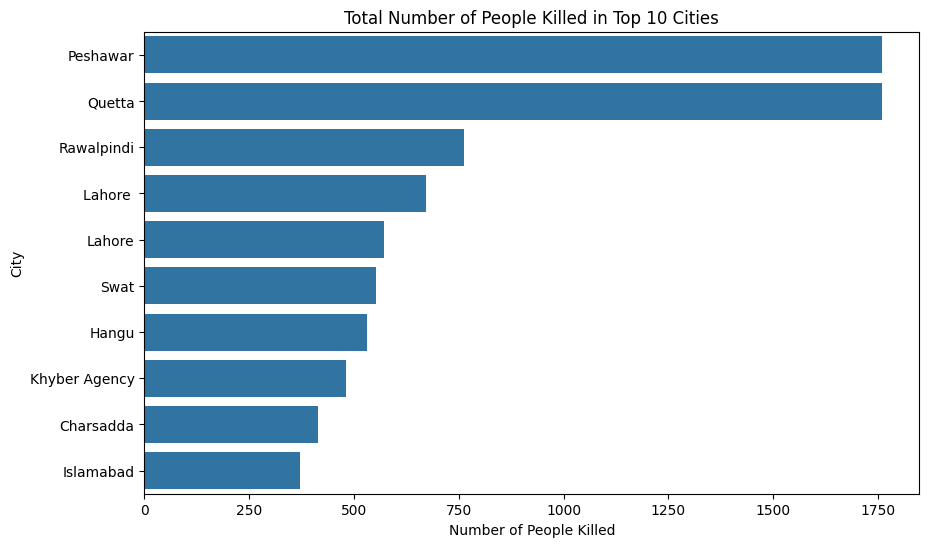

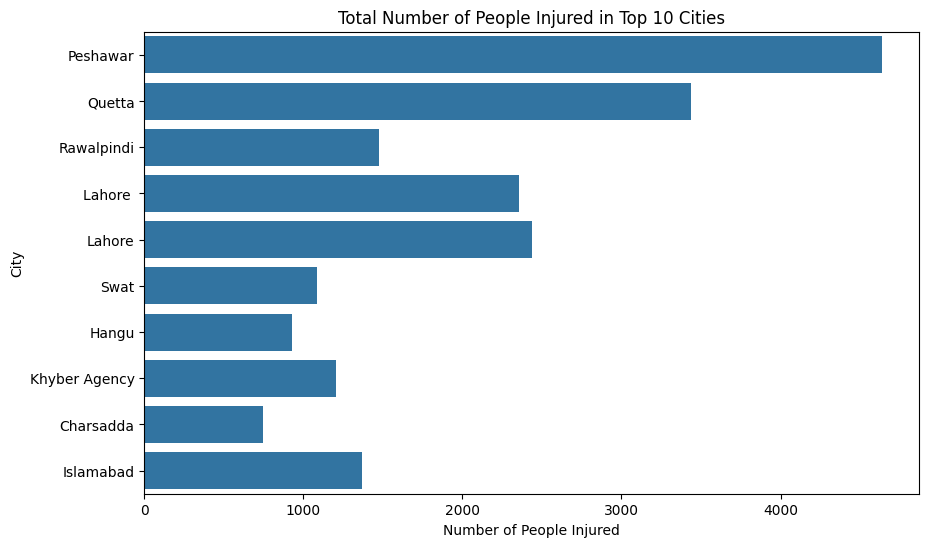

In [ ]:
# Sum the 'Killed Max' and 'Injured Max' for each city
casualties_by_city = df.groupby('City')[['Killed Max', 'Injured Max']].sum().sort_values(by='Killed Max', ascending=False).head(10)

# Plot the (killed max) by city
plt.figure(figsize=(10,6))
sns.barplot(x=casualties_by_city['Killed Max'], y=casualties_by_city.index)
plt.title('Total Number of People Killed in Top 10 Cities')
plt.xlabel('Number of People Killed')
plt.ylabel('City')
plt.show()

# Plot the (injured max) by city
plt.figure(figsize=(10,6))
sns.barplot(x=casualties_by_city['Injured Max'], y=casualties_by_city.index)
plt.title('Total Number of People Injured in Top 10 Cities')
plt.xlabel('Number of People Injured')
plt.ylabel('City')
plt.show()


**Severity of Attacks**

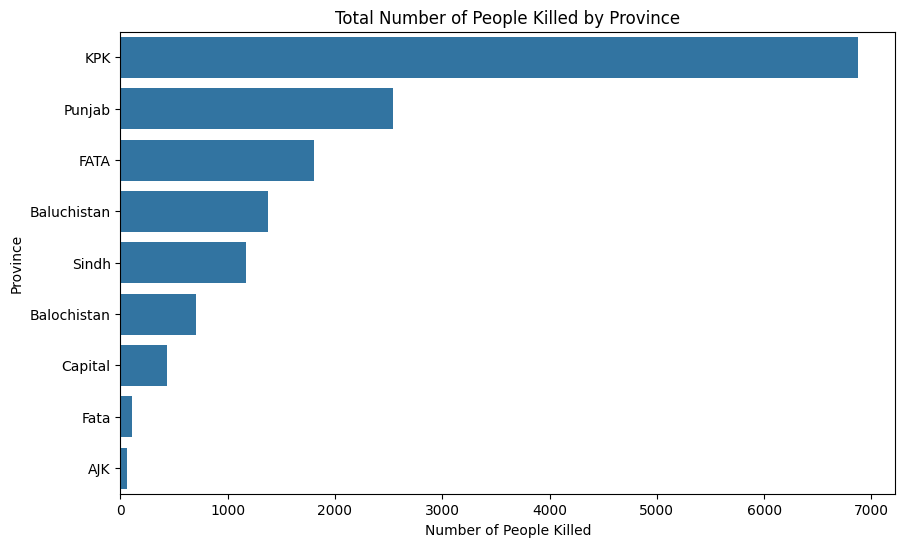

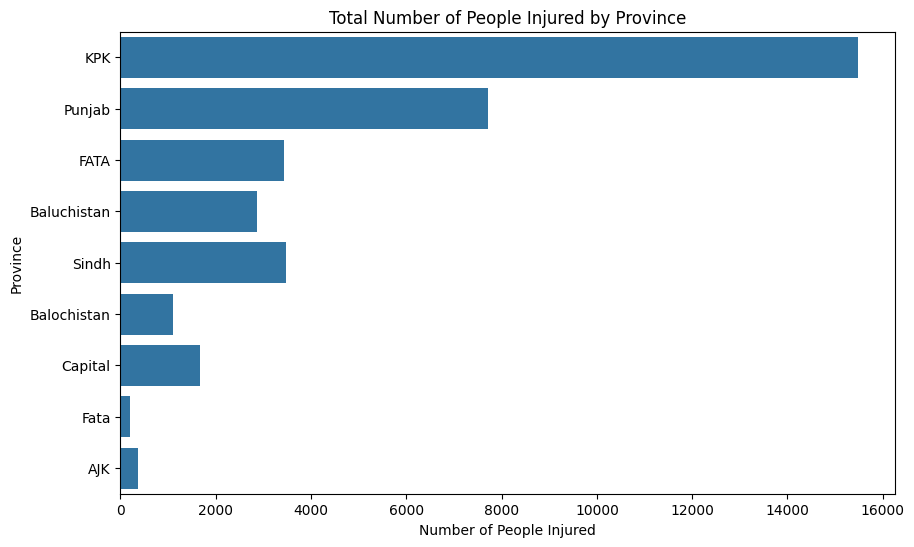

In [ ]:
# Sum the 'Killed Max' and 'Injured Max' for each province
casualties_by_province = df.groupby('Province')[['Killed Max', 'Injured Max']].sum().sort_values(by='Killed Max', ascending=False)

# Plot the (killed max) by province
plt.figure(figsize=(10,6))
sns.barplot(x=casualties_by_province['Killed Max'], y=casualties_by_province.index)
plt.title('Total Number of People Killed by Province')
plt.xlabel('Number of People Killed')
plt.ylabel('Province')
plt.show()

# Plot the (injured max) by province
plt.figure(figsize=(10,6))
sns.barplot(x=casualties_by_province['Injured Max'], y=casualties_by_province.index)
plt.title('Total Number of People Injured by Province')
plt.xlabel('Number of People Injured')
plt.ylabel('Province')
plt.show()


**Types of Attack**

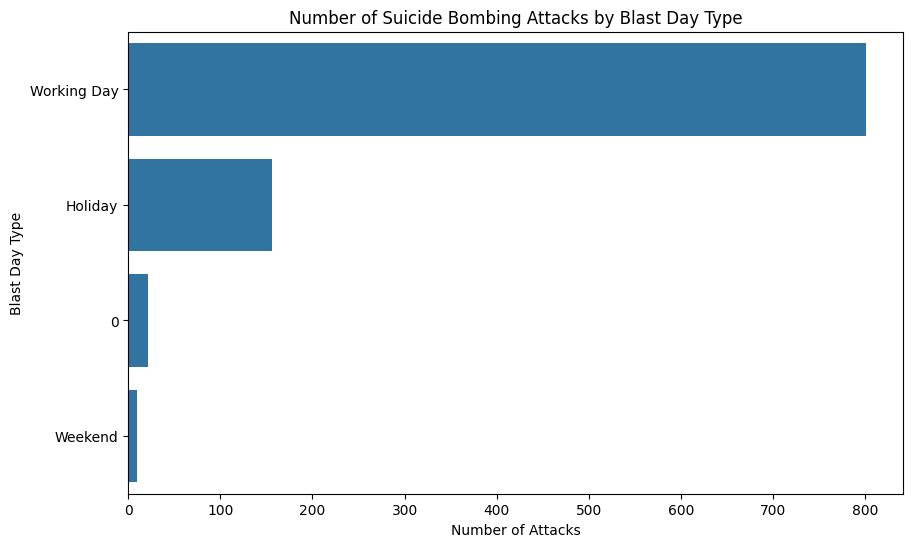

In [ ]:
# Blast day type
attacks_by_blast_type = df['Blast Day Type'].value_counts()

# Plot the number of attacks by blast day type
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_blast_type.values, y=attacks_by_blast_type.index)
plt.title('Number of Suicide Bombing Attacks by Blast Day Type')
plt.xlabel('Number of Attacks')
plt.ylabel('Blast Day Type')
plt.show()


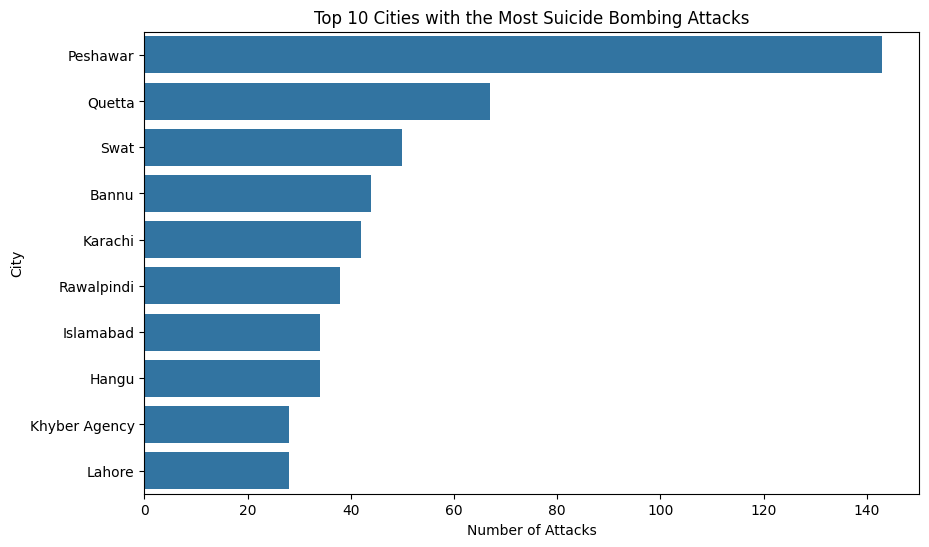

In [ ]:
# Count the number of attacks by city
attacks_by_city = df['City'].value_counts().head(10)  # Top 10 cities with the most attacks

# Plot the number of attacks by city
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_city.values, y=attacks_by_city.index)
plt.title('Top 10 Cities with the Most Suicide Bombing Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City')
plt.show()


**Analyse Attack by Province**

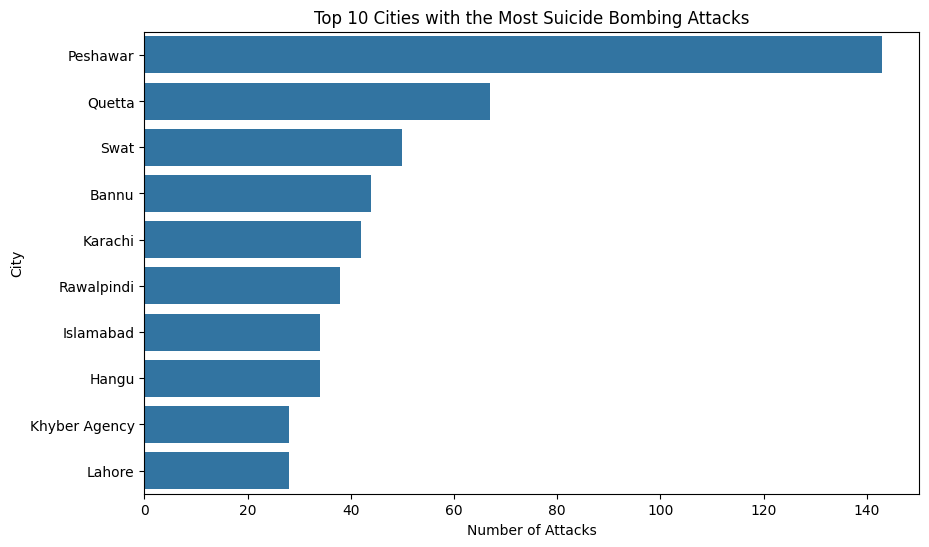

In [ ]:
# Count the number of attacks by city
attacks_by_city = df['City'].value_counts().head(10)

# Plot the number of attacks by city
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_city.values, y=attacks_by_city.index)
plt.title('Top 10 Cities with the Most Suicide Bombing Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City')
plt.show()


**Target Group**

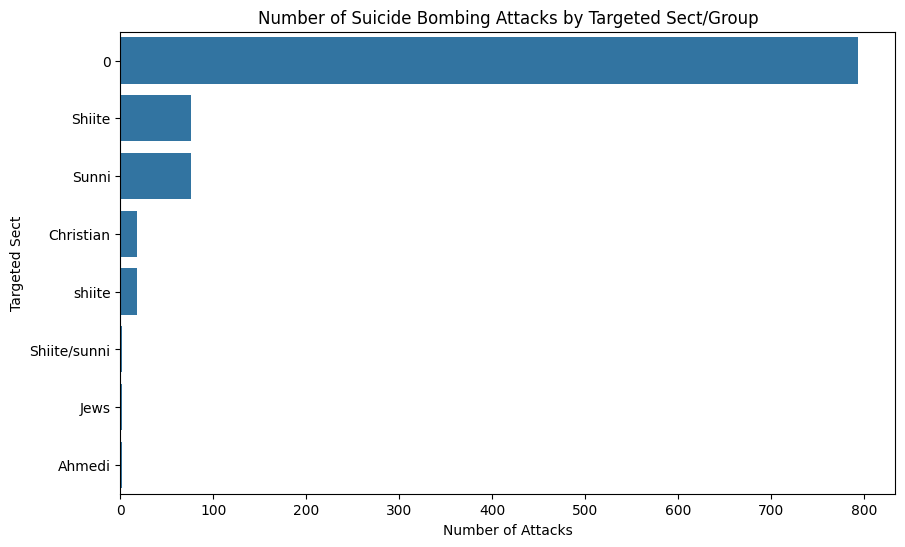

In [ ]:
# Step 1: Count the number of attacks
attacks_by_sect = df['Targeted Sect if any'].value_counts().dropna()

# Plot the number of attacks by targeted group
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_sect.values, y=attacks_by_sect.index)
plt.title('Number of Suicide Bombing Attacks by Targeted Sect/Group')
plt.xlabel('Number of Attacks')
plt.ylabel('Targeted Sect')
plt.show()



**Attack Type and Timing**

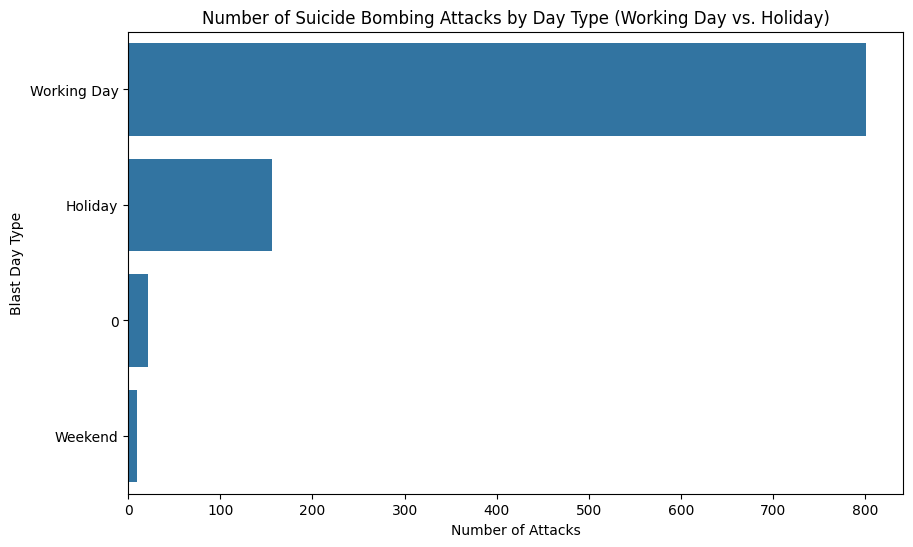

In [ ]:
# Step 1: Count the number of attacks by blast day type
attacks_by_day_type = df['Blast Day Type'].value_counts()

# Plot the number of attacks by blast day type
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_day_type.values, y=attacks_by_day_type.index)
plt.title('Number of Suicide Bombing Attacks by Day Type (Working Day vs. Holiday)')
plt.xlabel('Number of Attacks')
plt.ylabel('Blast Day Type')
plt.show()


**Time and Day Analysis**

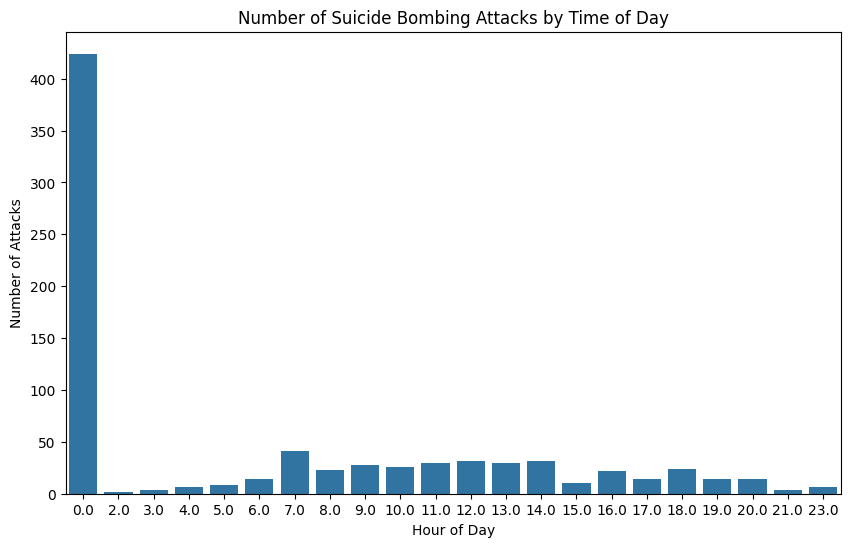

In [ ]:
# Convert 'Time' column to datetime (if available) and extract the hour
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Count the number of attacks by time of day (hour)
attacks_by_hour = df['Time'].value_counts().sort_index()

# Plot the number of attacks by hour of the day
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_by_hour.index, y=attacks_by_hour.values)
plt.title('Number of Suicide Bombing Attacks by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Attacks')
plt.show()


**Analysis of a specific city or province**

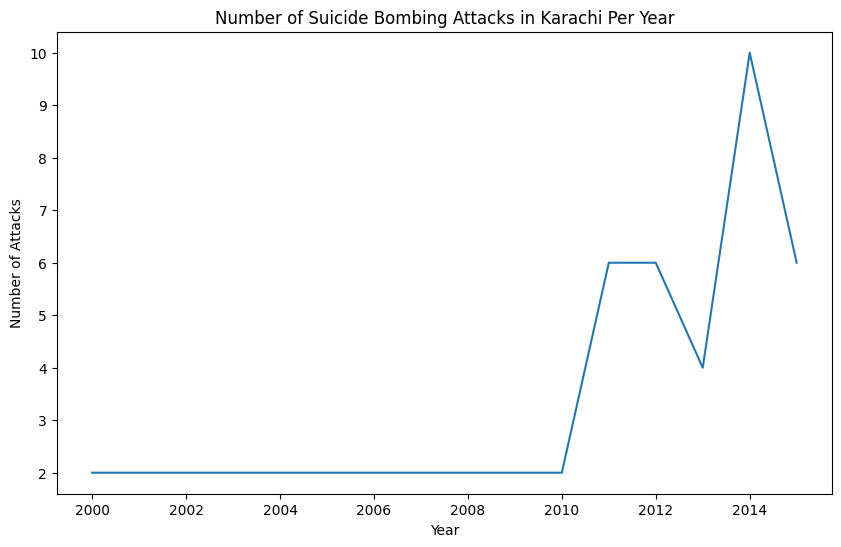

In [ ]:
# Filter data for a specific city (for example, Karachi)
city_name = 'Karachi'
df_city = df[df['City'] == city_name]

# Analyze the number of attacks over time in this city
attacks_per_year_city = df_city['Year'].value_counts().sort_index()

# Plot the number of attacks per year in the city
plt.figure(figsize=(10,6))
sns.lineplot(x=attacks_per_year_city.index, y=attacks_per_year_city.values)
plt.title(f'Number of Suicide Bombing Attacks in {city_name} Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


**Correlation between Variables**

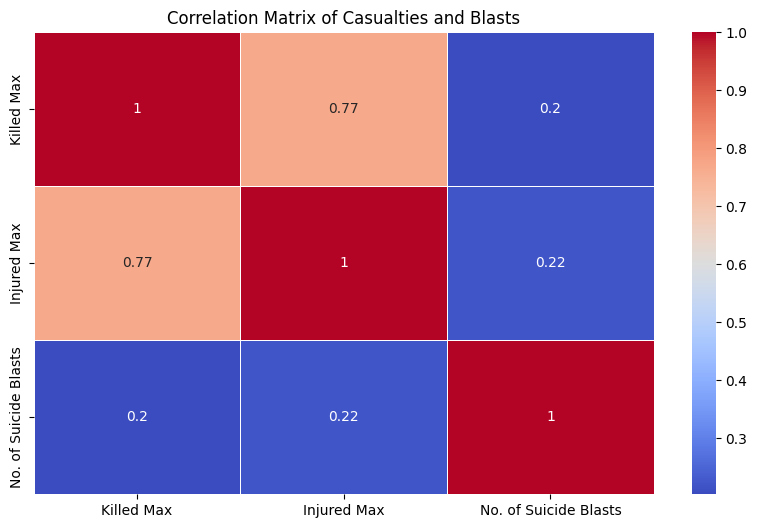

In [ ]:
# Select numeric columns for correlation analysis
numeric_columns = ['Killed Max', 'Injured Max', 'No. of Suicide Blasts']

# Convert 'Injured Max' and 'Killed Max' to numeric if they aren't already
df['Killed Max'] = pd.to_numeric(df['Killed Max'], errors='coerce')
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Casualties and Blasts')
plt.show()


**Seasonal Trend**

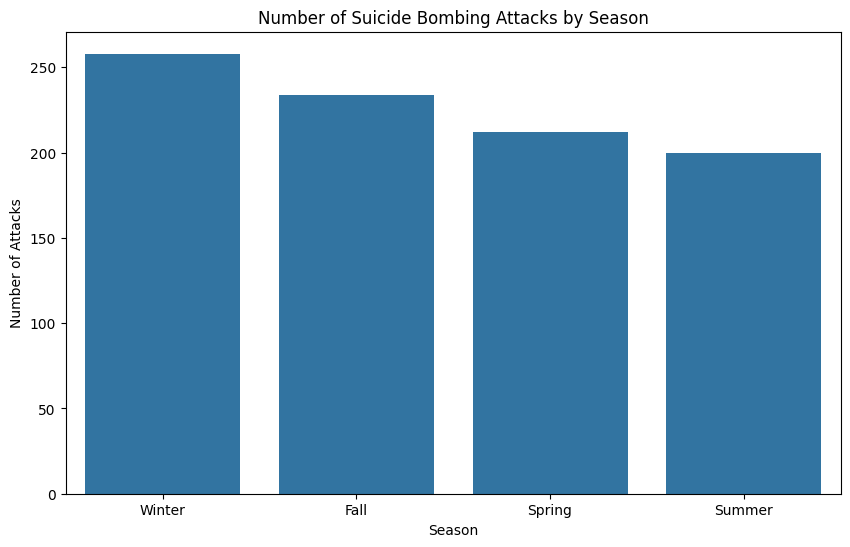

In [ ]:
# Define a mapping for seasons
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Create a new column for season based on the 'Month' column
df['Season'] = df['Month'].map(season_map)

# Count the number of attacks per season
attacks_per_season = df['Season'].value_counts()

# Plot the number of attacks by season
plt.figure(figsize=(10,6))
sns.barplot(x=attacks_per_season.index, y=attacks_per_season.values)
plt.title('Number of Suicide Bombing Attacks by Season')
plt.xlabel('Season')
plt.ylabel('Number of Attacks')
plt.show()


**Summary**
Therefore, the current study aimed at providing a brief exploratory analysis of suicide bombing attacks in Pakistan find the following important insights. The number of attacks also has been rising and falling at leafs and peaks, certain months and days of the week being a hub of activity. Regionally, only several cities and provinces account for a number of such cases, incurring a significant loss of lives and injury cases. As for the targeted sects or groups, including the specific affiliation, they were hit more severe than overall average. The fact that attacks take place during working days indicates that some places are being deliberately targeted. This also explains why many incidents are correlated to the number of blasts with affects and number of casualties. These findings present useful data for understanding attacks and defining security plans and policy measures for preventing future strikes.






